##  Análise Exploratória

Análise exploratória inicial do conjunto de dados de clientes, examinando distribuições, correlações e características gerais.

In [1]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn

from platform import python_version
#from ydata_profiling import ProfileReport

from src.config import DADOS_LIMPOS, RELATORIO
from src.graficos import PALETTE

sns.set_theme(palette="terrain")

#pandas configurando para mostrar todas as linhas e colunas
pd.set_option ('display.max_columns', None)
#configurando pandas para não mostrar notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)




In [2]:
df = pd.read_parquet(DADOS_LIMPOS)
df.head()

,Idade,Attrition,Viagens trab,Tarifa diária,Departamento,Distância casa,Formação acad,Área form,Satisf amb,Gênero,Tarifa hora,Envolv trab,Nível cargo,Cargo,Satisf trab,Estado civil,Renda mensal,Tarifa mensal,Nº empresas trab,Hora extra,% aumento sal,Avaliação desemp,Satisf relac,Opc ações,Anos traba,Treinam ultm ano,Equil vida-trab,Anos empresa,Anos cargo atual,Anos ult prom,Anos gerente atual
0,41,Sim,Raramente,1102,Vendas,1.61,2,Ciências biológicas,2,Feminino,94,3,2,Executivo de vendas,4,Solteiro,5993,19479,8,Sim,11,3,1,0,8,0,1,6,4,0,5
1,49,Não,Frequentemente,279,Pesquisa e Desenvolvimento,12.87,1,Ciências biológicas,3,Masculino,61,2,2,Cientista pesquisador,2,Casado,5130,24907,1,Não,23,4,4,1,10,3,3,10,7,1,7
2,37,Sim,Raramente,1373,Pesquisa e Desenvolvimento,3.22,2,Outros,4,Masculino,92,2,1,Técnico de laboratório,3,Solteiro,2090,2396,6,Sim,15,3,2,0,7,3,3,0,0,0,0
3,33,Não,Frequentemente,1392,Pesquisa e Desenvolvimento,4.83,4,Ciências biológicas,4,Feminino,56,3,1,Cientista pesquisador,3,Casado,2909,23159,1,Sim,11,3,3,0,8,3,3,8,7,3,0
4,27,Não,Raramente,591,Pesquisa e Desenvolvimento,3.22,1,Ciências médicas,1,Masculino,40,3,1,Técnico de laboratório,2,Casado,3468,16632,9,Não,12,3,4,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Idade               1470 non-null   int64  
 1   Attrition           1470 non-null   object 
 2   Viagens trab        1470 non-null   object 
 3   Tarifa diária       1470 non-null   int64  
 4   Departamento        1470 non-null   object 
 5   Distância casa      1470 non-null   float64
 6   Formação acad       1470 non-null   int64  
 7   Área form           1470 non-null   object 
 8   Satisf amb          1470 non-null   int64  
 9   Gênero              1470 non-null   object 
 10  Tarifa hora         1470 non-null   int64  
 11  Envolv trab         1470 non-null   int64  
 12  Nível cargo         1470 non-null   int64  
 13  Cargo               1470 non-null   object 
 14  Satisf trab         1470 non-null   int64  
 15  Estado civil        1470 non-null   object 
 16  Renda 

In [4]:
df.describe()

,Idade,Tarifa diária,Distância casa,Formação acad,Satisf amb,Tarifa hora,Envolv trab,Nível cargo,Satisf trab,Renda mensal,Tarifa mensal,Nº empresas trab,% aumento sal,Avaliação desemp,Satisf relac,Opc ações,Anos traba,Treinam ultm ano,Equil vida-trab,Anos empresa,Anos cargo atual,Anos ult prom,Anos gerente atual
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,14.79,2.91,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,13.05,1.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.61,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,3.22,2.00,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,11.27,3.00,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,22.53,4.00,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,46.67,5.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [5]:
df.describe(exclude="number")

,Attrition,Viagens trab,Departamento,Área form,Gênero,Cargo,Estado civil,Hora extra
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,Não,Raramente,Pesquisa e Desenvolvimento,Ciências biológicas,Masculino,Executivo de vendas,Casado,Não
freq,1233,1043,961,606,882,326,673,1054


In [6]:
#analisar a coluna target (balanceamento)
df['Attrition'].value_counts(normalize=True)*100

Attrition
Não   83.88
Sim   16.12
Name: proportion, dtype: float64

In [7]:
#relatório com a visão geral do banco de dados

#profile= ProfileReport(df)
#profile.to_file(RELATORIO)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/31 [00:00<?, ?it/s]
%|█████▎                                                                             | 2/31 [00:00<00:06,  4.69it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 58.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
colunas_categoricas_nao_ordenadas = [
    'Viagens trab',
    'Departamento',
    'Área form',
    'Gênero',
    'Cargo',
    'Estado civil',
    'Hora extra'
]
colunas_categoricas_ordenadas = [
    'Satisf amb',
    'Formação acad',
    'Satisf trab',
    'Envolv trab',
    'Nível cargo',
    'Avaliação desemp',
    'Satisf relac',
    'Opc ações',
    'Equil vida-trab',
     
]
colunas_target= ['Attrition']

colunas_numericas = [coluna for coluna in df.columns if coluna not in (
    colunas_categoricas_nao_ordenadas+colunas_categoricas_ordenadas+colunas_target)
                              ]
colunas_categoricas = colunas_categoricas_nao_ordenadas+colunas_categoricas_ordenadas
colunas_categoricas

['Viagens trab',
 'Departamento',
 'Área form',
 'Gênero',
 'Cargo',
 'Estado civil',
 'Hora extra',
 'Satisf amb',
 'Formação acad',
 'Satisf trab',
 'Envolv trab',
 'Nível cargo',
 'Avaliação desemp',
 'Satisf relac',
 'Opc ações',
 'Equil vida-trab']

In [8]:
len(colunas_numericas)

14

Histograma - detalhar a distribuição dos dados

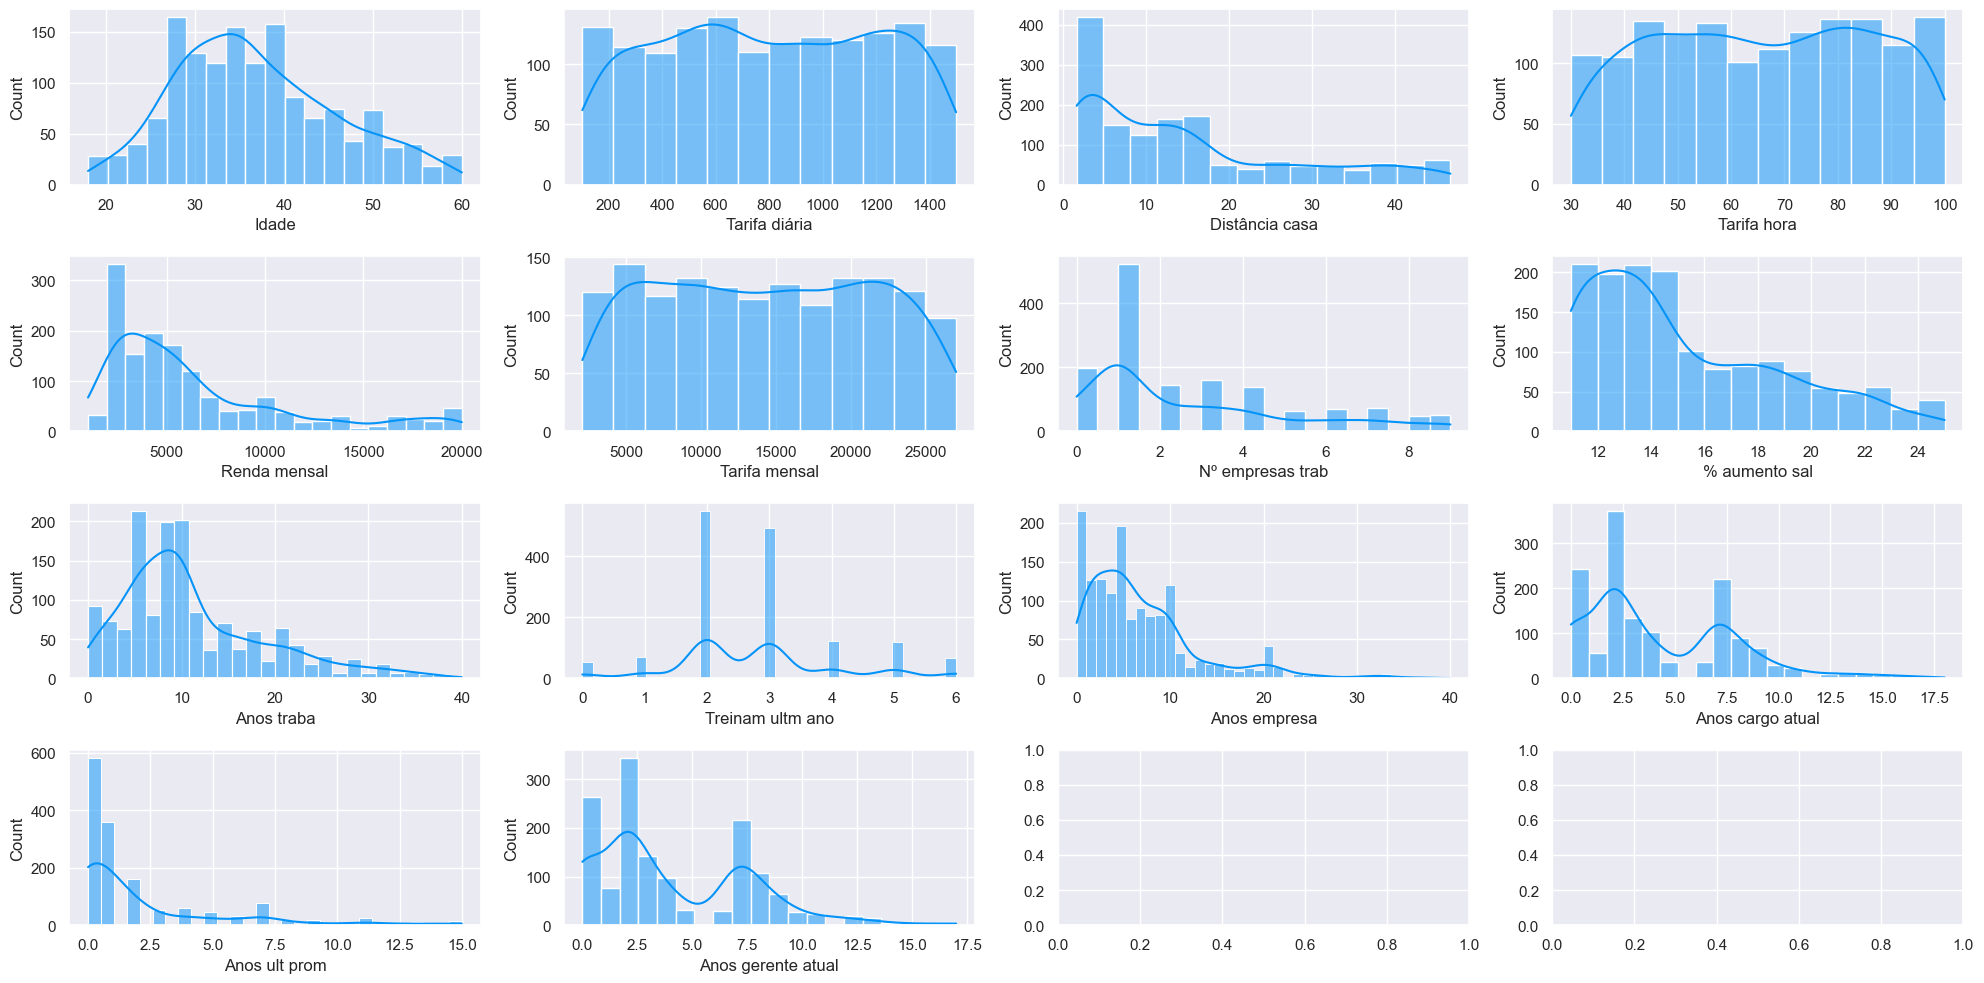

In [11]:
fig, axs = plt.subplots(4, 4, figsize=(20, 10) )

for ax, coluna in zip(axs.flatten(), colunas_numericas):
    sns.histplot(data = df, ax=ax, x=coluna, kde=True)
   
    
plt.tight_layout()
plt.show()

Destaca-se a distribuição atípica das colunas: Tarifa diária, hora e mensal.

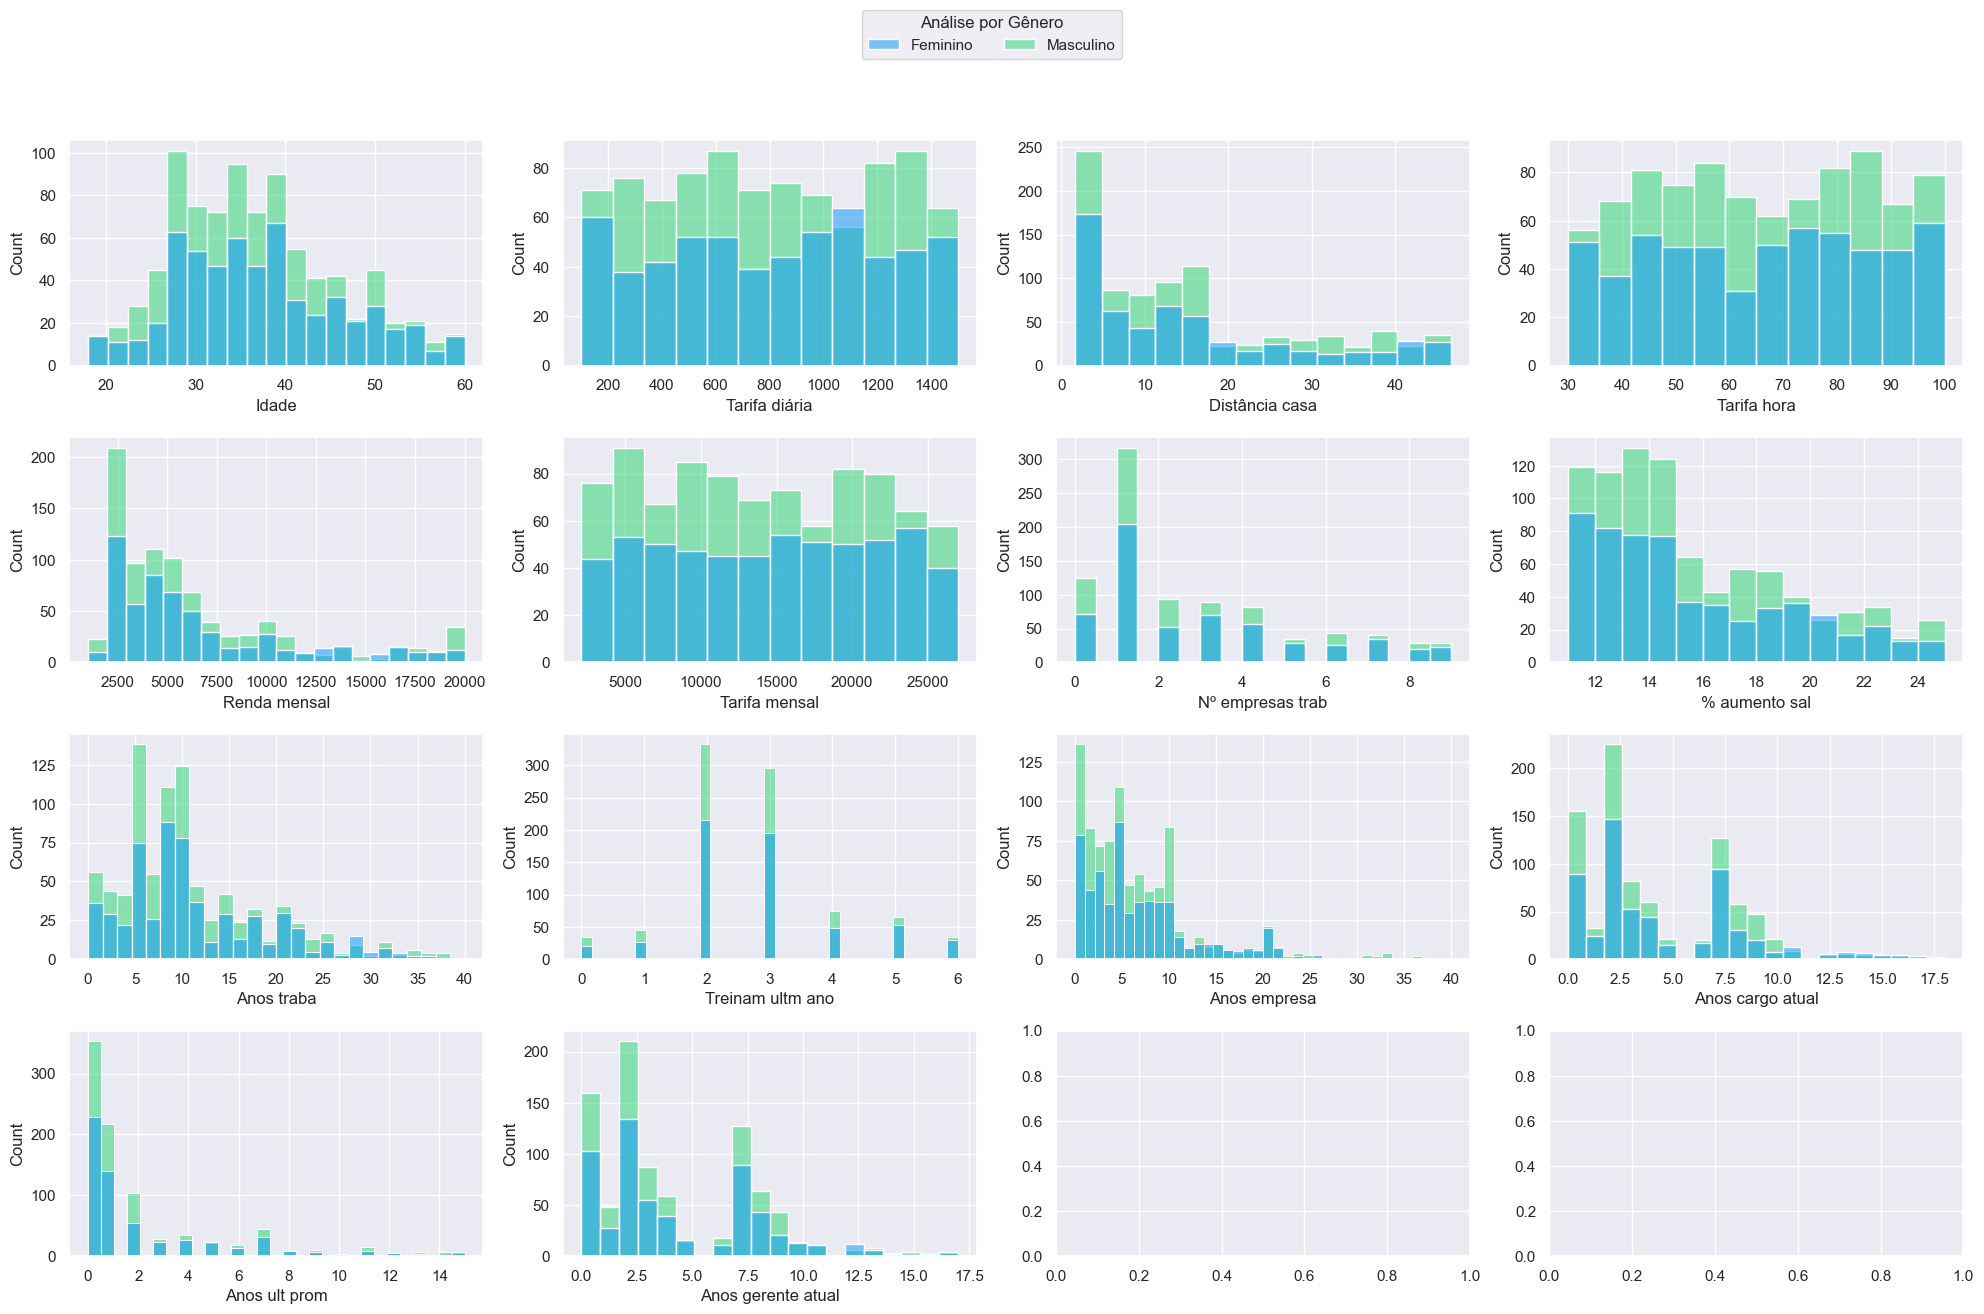

In [12]:
#análise comparando gêneros

fig, axs = plt.subplots(4, 4 , figsize=(20,12))

for ax, coluna in zip(axs.flatten(), colunas_numericas):
    sns.histplot(data = df, ax=ax, x=coluna, hue='Gênero')
    legenda=ax.get_legend()
    legenda.remove() 
rotulos= [text.get_text() for text in legenda.get_texts()]
fig.legend(handles=legenda.legend_handles, labels=rotulos, loc="upper center", title="Análise por Gênero", ncols=2, bbox_to_anchor=(0.5, 1.1))

    
plt.tight_layout()
plt.show()

Boxplot (para complementar a análise feita pelo histograma das colunas numéricas) 

Visualização e distribuição dos dados (valores discrepantes, quartis,  mediana, valores mínumos e máximos, comprimento da cauda dos dados, tendência central etc) de cada feature em relação ao Attrition.

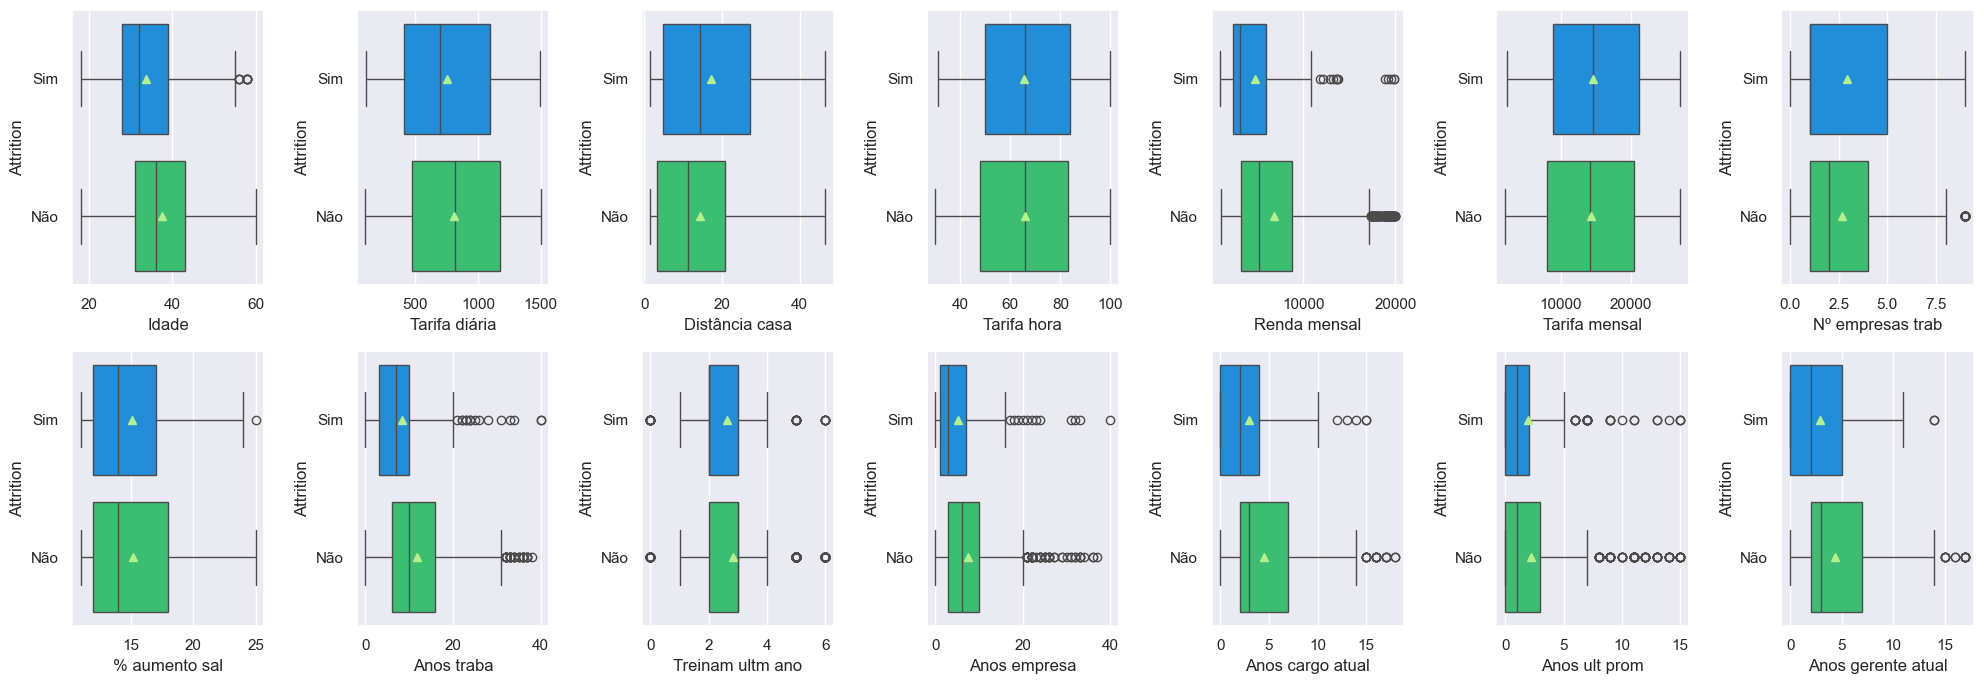

In [13]:
fig, axs = plt.subplots(2, 7 , figsize=(20,7))

for ax, coluna in zip(axs.flatten(), colunas_numericas):
    sns.boxplot(data = df, ax=ax, x=coluna, showmeans=True, y="Attrition", hue='Attrition')
    
plt.tight_layout()
plt.show()

Há uma leve indicação de que o Attrition acontece mais entre pessoas com menos tempo de empresa, mais novas, com menor renda mensal e menos tempo no cargo atual.
Diversas features com outliers.

Análise das colunas categóricas

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Idade               1470 non-null   int64  
 1   Attrition           1470 non-null   object 
 2   Viagens trab        1470 non-null   object 
 3   Tarifa diária       1470 non-null   int64  
 4   Departamento        1470 non-null   object 
 5   Distância casa      1470 non-null   float64
 6   Formação acad       1470 non-null   int64  
 7   Área form           1470 non-null   object 
 8   Satisf amb          1470 non-null   int64  
 9   Gênero              1470 non-null   object 
 10  Tarifa hora         1470 non-null   int64  
 11  Envolv trab         1470 non-null   int64  
 12  Nível cargo         1470 non-null   int64  
 13  Cargo               1470 non-null   object 
 14  Satisf trab         1470 non-null   int64  
 15  Estado civil        1470 non-null   object 
 16  Renda 

In [15]:
df['Gênero'].value_counts(normalize=True)*100

Gênero
Masculino   60.00
Feminino    40.00
Name: proportion, dtype: float64

In [16]:
df['Departamento'].value_counts(normalize=True)*100

Departamento
Pesquisa e Desenvolvimento   65.37
Vendas                       30.34
Recursos Humanos              4.29
Name: proportion, dtype: float64

In [21]:
mapeamento_educacao = {
    1:"Educação Básica",
    2: "Educação Superior",
    3: "Bacharelado",
    4: "Mestrado",
    5: "Doutorado"
}
df_analise_categoricas= df.copy()

df_analise_categoricas["Formação acad"] =df_analise_categoricas["Formação acad"].map(mapeamento_educacao) 
df_analise_categoricas["Formação acad"].value_counts(normalize=True)*100


Formação acad
Bacharelado         38.91
Mestrado            27.07
Educação Superior   19.18
Educação Básica     11.56
Doutorado            3.27
Name: proportion, dtype: float64

In [ ]:
df_analise_educacao["Área form"].value_counts(normalize=True)*100

In [24]:
mapeamento_satisfacao = {
    1:"Insatisfeito",
    2: "Razoável",
    3: "Satisfeito",
    4: "Muito satisfeito",
}
colunas_satisfacao = [ coluna for coluna in df.filter(like='Satisf').columns]
for coluna in colunas_satisfacao:
    df_analise_categoricas[coluna] =df_analise_categoricas[coluna].map(mapeamento_satisfacao) 

df_analise_categoricas["Satisf amb"].value_counts(normalize=True)*100

Satisf amb
Satisfeito         30.82
Muito satisfeito   30.34
Razoável           19.52
Insatisfeito       19.32
Name: proportion, dtype: float64

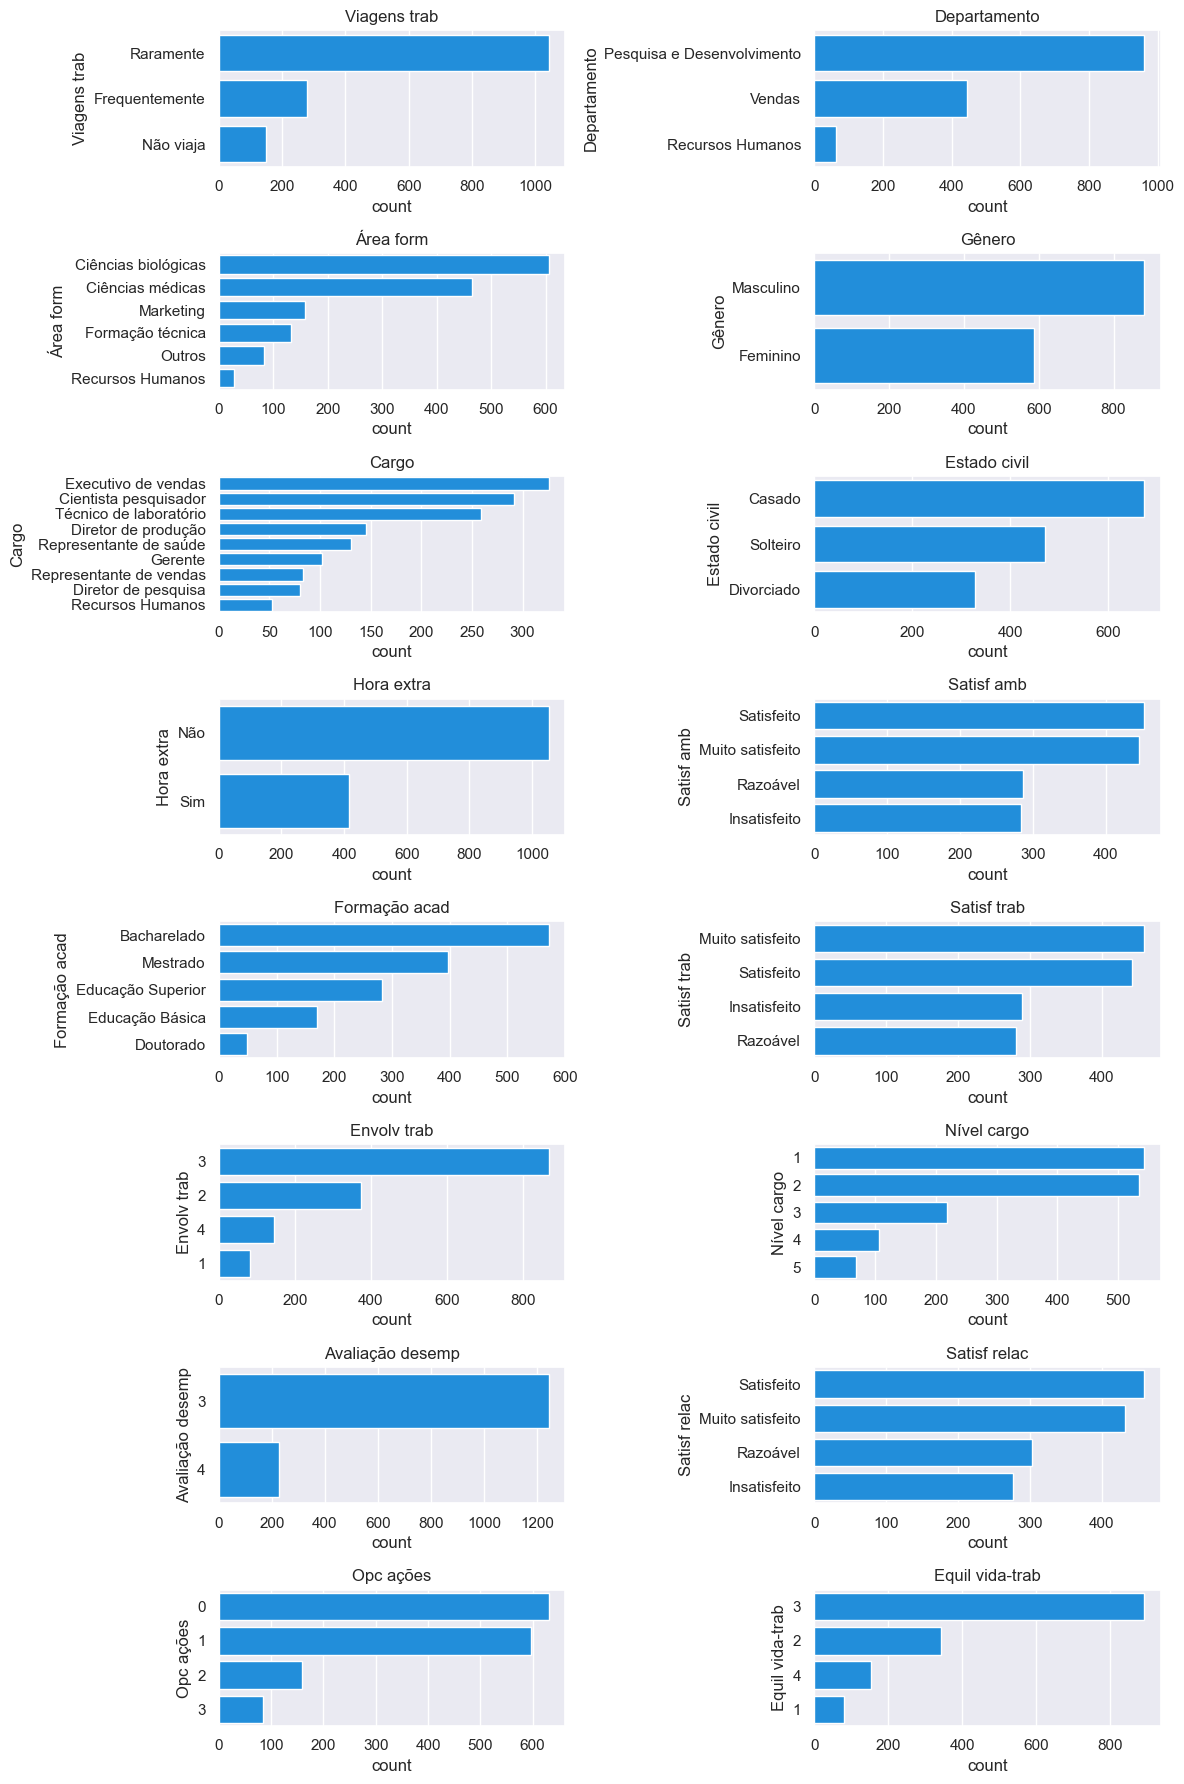

In [25]:
fig, axs = plt.subplots(8, 2 , figsize=(12,18))

for ax, coluna in zip(axs.flatten(), colunas_categoricas):
    sns.countplot(
        data=df_analise_categoricas, 
        y=coluna, 
        ax=ax, 
        order=df_analise_categoricas[coluna].value_counts().index
    )
    ax.set_title(coluna)
    
plt.tight_layout()
plt.show()

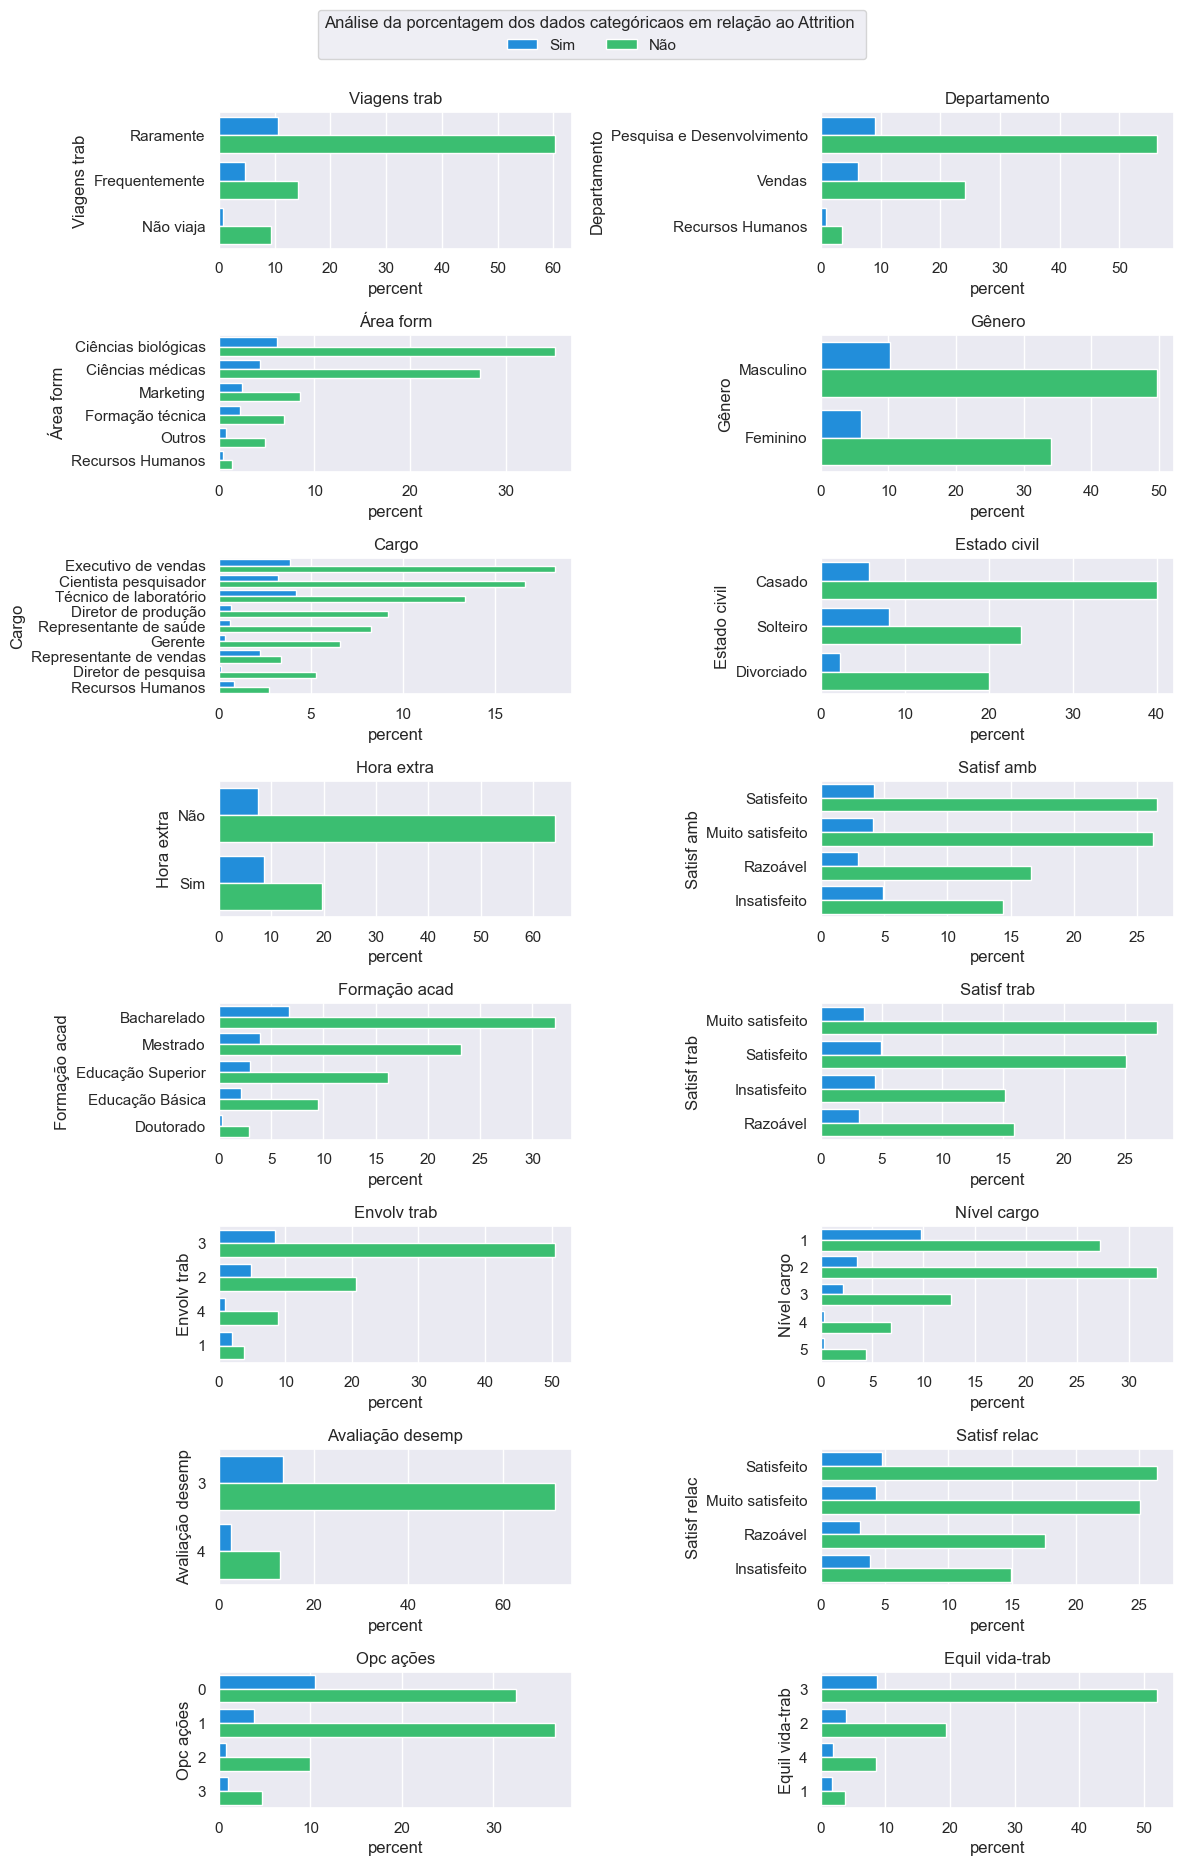

In [26]:
fig, axs = plt.subplots(8, 2 , figsize=(12,18))

for ax, coluna in zip(axs.flatten(), colunas_categoricas):
    sns.countplot(data=df_analise_categoricas, y=coluna, ax=ax, hue="Attrition", stat="percent", order=df_analise_categoricas[coluna].value_counts().index)
    ax.set_title(coluna)
    legenda=ax.get_legend()
    legenda.remove() 
rotulos= [text.get_text() for text in legenda.get_texts()]

fig.legend(handles=legenda.legend_handles, labels=rotulos, loc="upper center", title="Análise da porcentagem dos dados categóricaos em relação ao Attrition ", ncols=2, bbox_to_anchor=(0.5, 1.04))# para as informações ficarem lado a lado
plt.tight_layout()
plt.show()

É possível observar o atrito maior entre os funcionários que viajam a trabalho frequentementes, solteiros, aqueles que fazem hora extra e se sentem insatisfeitos com o ambiente de trabalho.

In [27]:
#avaliar correlação entre as variáveis
display(df[colunas_numericas].corr(method="spearman"))


,Idade,Tarifa diária,Distância casa,Tarifa hora,Renda mensal,Tarifa mensal,Nº empresas trab,% aumento sal,Anos traba,Treinam ultm ano,Anos empresa,Anos cargo atual,Anos ult prom,Anos gerente atual
Idade,1.00,0.01,-0.02,0.03,0.47,0.02,0.35,0.01,0.66,0.00,0.25,0.20,0.17,0.19
Tarifa diária,0.01,1.00,-0.00,0.02,0.02,-0.03,0.04,0.03,0.02,-0.01,-0.01,0.01,-0.04,-0.00
Distância casa,-0.02,-0.00,1.00,0.02,0.00,0.04,-0.01,0.03,-0.00,-0.02,0.01,0.01,-0.00,0.00
Tarifa hora,0.03,0.02,0.02,1.00,-0.02,-0.01,0.02,-0.01,-0.01,0.00,-0.03,-0.03,-0.05,-0.01
Renda mensal,0.47,0.02,0.00,-0.02,1.00,0.05,0.19,-0.03,0.71,-0.03,0.46,0.39,0.26,0.37
Tarifa mensal,0.02,-0.03,0.04,-0.01,0.05,1.00,0.02,-0.01,0.01,-0.01,-0.03,-0.01,-0.02,-0.04
Nº empresas trab,0.35,0.04,-0.01,0.02,0.19,0.02,1.00,0.00,0.32,-0.05,-0.17,-0.13,-0.07,-0.14
% aumento sal,0.01,0.03,0.03,-0.01,-0.03,-0.01,0.00,1.00,-0.03,-0.00,-0.05,-0.03,-0.06,-0.03
Anos traba,0.66,0.02,-0.00,-0.01,0.71,0.01,0.32,-0.03,1.00,-0.01,0.59,0.49,0.33,0.50
Treinam ultm ano,0.00,-0.01,-0.02,0.00,-0.03,-0.01,-0.05,-0.00,-0.01,1.00,0.00,0.00,0.01,-0.01


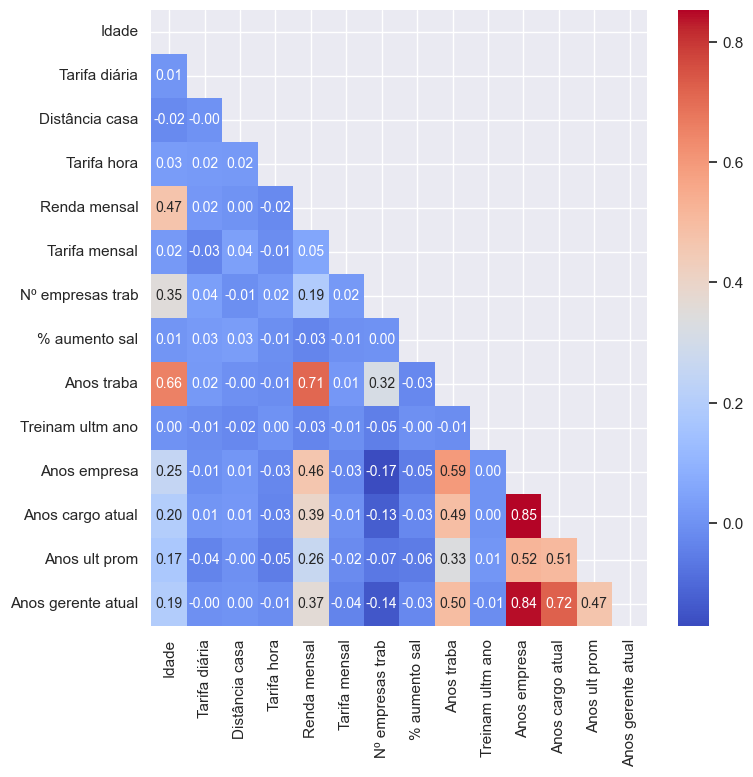

In [20]:
#analisar correlação entre as colunas
matriz = np.triu(df[colunas_numericas].corr(method="spearman"))

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(
    df[colunas_numericas].corr("spearman"),
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    cmap=PALETTE,
    annot_kws={"fontsize": 10}
)

plt.show()

É possível observar que a correlação é maior entre Idade, Renda Mensal e Total de anos trabalhados. O memso acontece entre Anos na empresa, Anos no cargo atual e Anos com o gerente atual.

Nenhuma correlação negativa se destaca

## Conclusão - Análise Exploratória (EDA)

#### Base: 

A coluna target é desbalanceada.

Attrition 
Não | Sim
84% | 16%

Também é possível destacar a diferença entre funcionários do sexo masculino (60%) x feminino(40%) e a distribuição de funcionários da empresa nos Departamentos:
Pesquisa e Desenvolvimento   65.37%
Vendas                       30.34%
Recursos Humanos              4.29%

#### Distribuições: 

É possível perceber colunas numéricas com distribuição distinta das demais que não se proxima da distribuição normal: 'DailyRate', 'HourlyRate', 'MonthilyRate'. 

A feature Idade apresenta uma distribuição bem próxima à distribuição normal.

#### Coluna target:

A análise mostrou que há mais atrito entre funicionários que fazem hora extra, viajem frequentemente a trabalho assim como entre os solteiros e aqueles insatisfeitos com o ambiente de trabalho.

Há uma leve indicação de que o Attrition acontece mais entre pessoas com menos tempo de empresa, mais novas, com menor renda mensal e menos tempo no cargo atual.
Diversas features com outliers.

